In [355]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [460]:
plt.style.use('bmh')

In [3]:
df = pd.read_csv('./data/training_set_VU_DM.csv')

In [65]:
df['search_date'] = pd.to_datetime(df['date_time']).dt.date
df['search_time'] = pd.to_datetime(df['date_time']).dt.time

In [116]:
df['day_of_week'] = df['search_date'].apply(lambda x: x.weekday())
df['day_of_week_str'] = df['search_date'].apply(lambda x: x.strftime('%A'))
df['month_str'] = df['search_date'].apply(lambda x: x.strftime('%B'))
df['hour_of_day'] = df['search_time'].apply(lambda x: x.hour)

In [98]:
#df['hour_of_day'] = df['search_time'].apply(lambda x: x.hour)

In [117]:
df_booked = df[df['booking_bool'] == 1]

In [301]:
df_visitor_hist = df.dropna(axis='rows', subset=['visitor_hist_starrating'])

df_visitor_hist.groupby('srch_id').first()


,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,search_date,search_time,day_of_week,day_of_week_str,hour_of_day,month_str
srch_id,,,,,,,,,,,,,,,,,,,,,
47,2013-01-14 22:28:43,14,100,4.31,180.75,137,6618,3,4.0,0,...,NaN,0,924.00,0,2013-01-14,22:28:43,0,Monday,22,January
49,2013-02-07 18:40:10,16,31,2.50,270.08,31,983,4,4.0,0,...,NaN,0,128.48,0,2013-02-07,18:40:10,3,Thursday,18,February
80,2013-01-03 10:58:19,5,219,2.50,122.34,219,409,3,4.0,1,...,20.0,0,324.08,0,2013-01-03,10:58:19,3,Thursday,10,January
87,2013-05-15 18:22:23,16,31,3.74,210.60,31,155,4,4.0,0,...,2.0,0,96.90,0,2013-05-15,18:22:23,2,Wednesday,18,May
108,2013-03-04 15:52:06,12,69,3.35,229.18,219,6727,3,4.0,1,...,9.0,0,NaN,0,2013-03-04,15:52:06,0,Monday,15,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332723,2013-04-23 09:18:28,5,219,3.39,143.18,219,1221,3,4.0,1,...,NaN,0,1257.24,0,2013-04-23,09:18:28,1,Tuesday,9,April
332732,2012-12-30 12:54:21,5,219,2.63,117.68,219,2416,2,2.0,1,...,12.0,0,233.39,0,2012-12-30,12:54:21,6,Sunday,12,December
332768,2013-06-14 10:27:10,5,219,3.75,194.22,219,2145,0,4.0,1,...,10.0,0,163.05,0,2013-06-14,10:27:10,4,Friday,10,June


In [302]:
df_visitor_hist_2 = df.dropna(axis='rows', subset=['visitor_hist_adr_usd'])

df_visitor_hist_2.groupby('srch_id').first()

,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,search_date,search_time,day_of_week,day_of_week_str,hour_of_day,month_str
srch_id,,,,,,,,,,,,,,,,,,,,,
47,2013-01-14 22:28:43,14,100,4.31,180.75,137,6618,3,4.0,0,...,NaN,0,924.00,0,2013-01-14,22:28:43,0,Monday,22,January
49,2013-02-07 18:40:10,16,31,2.50,270.08,31,983,4,4.0,0,...,NaN,0,128.48,0,2013-02-07,18:40:10,3,Thursday,18,February
80,2013-01-03 10:58:19,5,219,2.50,122.34,219,409,3,4.0,1,...,20.0,0,324.08,0,2013-01-03,10:58:19,3,Thursday,10,January
87,2013-05-15 18:22:23,16,31,3.74,210.60,31,155,4,4.0,0,...,2.0,0,96.90,0,2013-05-15,18:22:23,2,Wednesday,18,May
108,2013-03-04 15:52:06,12,69,3.35,229.18,219,6727,3,4.0,1,...,9.0,0,NaN,0,2013-03-04,15:52:06,0,Monday,15,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332723,2013-04-23 09:18:28,5,219,3.39,143.18,219,1221,3,4.0,1,...,NaN,0,1257.24,0,2013-04-23,09:18:28,1,Tuesday,9,April
332732,2012-12-30 12:54:21,5,219,2.63,117.68,219,2416,2,2.0,1,...,12.0,0,233.39,0,2012-12-30,12:54:21,6,Sunday,12,December
332768,2013-06-14 10:27:10,5,219,3.75,194.22,219,2145,0,4.0,1,...,10.0,0,163.05,0,2013-06-14,10:27:10,4,Friday,10,June


In [303]:
df_visitor_hist_tot = df.dropna(axis='rows', subset=['visitor_hist_starrating', 'visitor_hist_adr_usd'])

df_visitor_hist_tot.groupby('srch_id').first()

,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,search_date,search_time,day_of_week,day_of_week_str,hour_of_day,month_str
srch_id,,,,,,,,,,,,,,,,,,,,,
47,2013-01-14 22:28:43,14,100,4.31,180.75,137,6618,3,4.0,0,...,NaN,0,924.00,0,2013-01-14,22:28:43,0,Monday,22,January
49,2013-02-07 18:40:10,16,31,2.50,270.08,31,983,4,4.0,0,...,NaN,0,128.48,0,2013-02-07,18:40:10,3,Thursday,18,February
80,2013-01-03 10:58:19,5,219,2.50,122.34,219,409,3,4.0,1,...,20.0,0,324.08,0,2013-01-03,10:58:19,3,Thursday,10,January
87,2013-05-15 18:22:23,16,31,3.74,210.60,31,155,4,4.0,0,...,2.0,0,96.90,0,2013-05-15,18:22:23,2,Wednesday,18,May
108,2013-03-04 15:52:06,12,69,3.35,229.18,219,6727,3,4.0,1,...,9.0,0,NaN,0,2013-03-04,15:52:06,0,Monday,15,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332723,2013-04-23 09:18:28,5,219,3.39,143.18,219,1221,3,4.0,1,...,NaN,0,1257.24,0,2013-04-23,09:18:28,1,Tuesday,9,April
332732,2012-12-30 12:54:21,5,219,2.63,117.68,219,2416,2,2.0,1,...,12.0,0,233.39,0,2012-12-30,12:54:21,6,Sunday,12,December
332768,2013-06-14 10:27:10,5,219,3.75,194.22,219,2145,0,4.0,1,...,10.0,0,163.05,0,2013-06-14,10:27:10,4,Friday,10,June


In [215]:
df_affinity = df.dropna(axis='rows', subset=['srch_query_affinity_score'])

317406

In [231]:
len(df_booked)

138390

In [234]:
df_clicked = df[df['click_bool'] == 1]

In [216]:
len(df_affinity.groupby('srch_id').count())

13600

In [229]:
df_promotion = df[df['promotion_flag'] == 1]

In [344]:
df_random = df[df['random_bool'] == 1]
len(df_random.groupby('srch_id').count())

60751

In [345]:
df_n_random = df[df['random_bool'] == 0]

139044

In [253]:
df_bool_sum = df[['booking_bool', 'click_bool', 'srch_id']].groupby('srch_id').sum()

In [257]:
df_bool_sum.describe()

,booking_bool,click_bool
count,199795.000000,199795.000000
mean,0.692660,1.110533
std,0.461393,0.563393
min,0.000000,1.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,25.000000


In [299]:
len(df_bool_sum[df_bool_sum['click_bool'] > 1])

13031

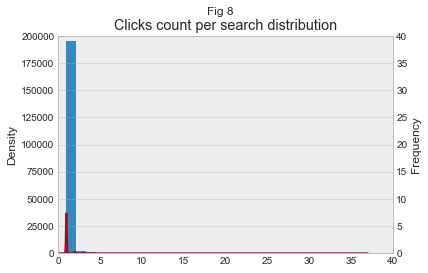

In [473]:
ax = df_bool_sum.click_bool.plot(kind='hist', bins = 20)
df_bool_sum.click_bool.plot(kind='kde', ax=ax, secondary_y=True)
plt.title('Clicks count per search distribution')
plt.suptitle('Fig 8')
plt.xlabel('Clicks count per search')
plt.ylabel('Frequency')
plt.axis([0, 40, 0, 40])
ax.axis([0, 40, 0, 200000])
#plt.xticks(rotation=5)
plt.show()

In [134]:
len(df_booked)

138390

In [135]:
len(df_booked.groupby('srch_id').count())

138390

In [ ]:
# There can only be one booking per search

In [66]:
df_test = pd.read_csv('./data/test_set_VU_DM.csv')

In [67]:
df_test['search_date'] = pd.to_datetime(df_test['date_time']).dt.date
df_test['search_time'] = pd.to_datetime(df_test['date_time']).dt.time

In [448]:
df_test['day_of_week'] = df_test['search_date'].apply(lambda x: x.weekday())
df_test['day_of_week_str'] = df_test['search_date'].apply(lambda x: x.strftime('%A'))
df_test['month_str'] = df_test['search_date'].apply(lambda x: x.strftime('%B'))
df_test['hour_of_day'] = df_test['search_time'].apply(lambda x: x.hour)

In [449]:
df_test.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv

In [4]:
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [5]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [6]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [11]:
df.isnull()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
1,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
2,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
3,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,False,False,True,False
4,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False
4958343,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False
4958344,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False
4958345,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False


In [15]:
print ("Number of unique searches")
len(df[['srch_id']].groupby('srch_id').count())

Number of unique searches


199795

In [73]:
print ("Number of searches with a click")
df_clicked = df[df['click_bool'] == 1]
len(df_clicked[['srch_id']].groupby('srch_id').count())

Number of searches with a click


199795

In [102]:
print ("Number of searches with a book")
len(df_booked[['srch_id']].groupby('srch_id').count())

Number of searches with a book


138390

In [20]:
print ("Number of unique searches")
search_counts = df[['srch_id', 'date_time']].groupby('srch_id').count()
search_counts.describe()

Number of unique searches


,date_time
count,199795.000000
mean,24.817173
std,9.113335
min,5.000000
25%,18.000000
50%,29.000000
75%,32.000000
max,38.000000


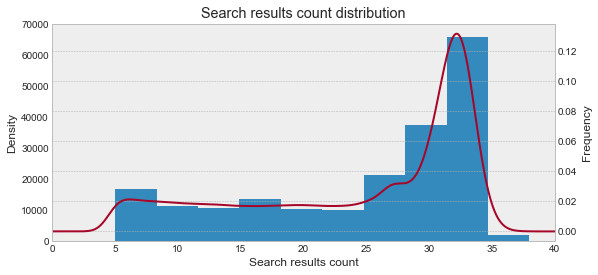

In [471]:
ax = search_counts.date_time.plot(kind='hist', figsize=(9,4))
search_counts.date_time.plot(kind='kde', ax=ax, secondary_y=True)
plt.title('Search results count distribution')
plt.xlabel('Search results count')
ax.set_xlabel("Search results count")
plt.ylabel('Frequency')
#plt.axis([0, 40, 0, 40])
ax.axis([0, 40, 0, 70000])
#plt.xticks(rotation=5)
plt.show()

In [36]:
df[['srch_id', 'visitor_location_country_id', 'date_time']]

,srch_id,visitor_location_country_id,date_time
0,1,187,2013-04-04 08:32:15
1,1,187,2013-04-04 08:32:15
2,1,187,2013-04-04 08:32:15
3,1,187,2013-04-04 08:32:15
4,1,187,2013-04-04 08:32:15
...,...,...,...
4958342,332785,219,2013-06-30 19:55:18
4958343,332785,219,2013-06-30 19:55:18
4958344,332785,219,2013-06-30 19:55:18
4958345,332785,219,2013-06-30 19:55:18


In [41]:
print ("Number of unique searches per country of visitor")
search_visitor_country = df[['srch_id', 'visitor_location_country_id']].groupby(['visitor_location_country_id']).srch_id.nunique()
search_visitor_country = pd.DataFrame(search_visitor_country)
search_visitor_country.describe()

Number of unique searches per country of visitor


,srch_id
count,210.000000
mean,951.404762
std,8065.894174
min,1.000000
25%,5.000000
50%,17.000000
75%,92.500000
max,114186.000000


In [43]:
search_location_country = df[['srch_id', 'srch_destination_id']].groupby(['srch_destination_id']).srch_id.nunique()
search_location_country = pd.DataFrame(search_location_country)
search_location_country.describe()

,srch_id
count,18127.000000
mean,11.021956
std,49.124948
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,2464.000000


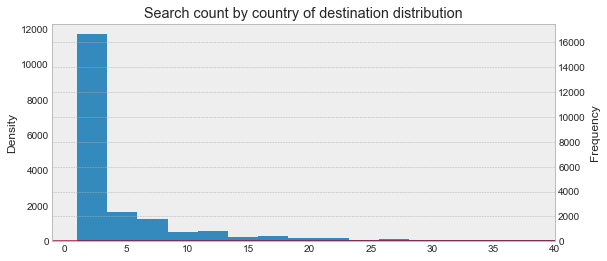

In [476]:
ax = search_location_country.srch_id.plot(kind='hist', bins=1000, figsize=(9,4))
search_location_country.srch_id.plot(kind='kde', ax=ax, secondary_y=True)
plt.title('Search count by country of destination distribution')
#plt.suptitle('Fig 2')
plt.xlabel('Search count by country of destination')
plt.ylabel('Frequency')
plt.axis([-1, 40, 0, 17500])
#plt.xticks(rotation=5)
plt.show()
#(plot is zoomed in to most dense region)

In [71]:
search_week_day = df[['srch_id', 'day_of_week_str']]
search_week_day

,srch_id,day_of_week_str
0,1,Thursday
1,1,Thursday
2,1,Thursday
3,1,Thursday
4,1,Thursday
...,...,...
4958342,332785,Sunday
4958343,332785,Sunday
4958344,332785,Sunday
4958345,332785,Sunday


In [91]:
print ("Searches by day of the week")
search_week_day = df[['srch_id', 'day_of_week_str']].groupby(['day_of_week_str']).srch_id.nunique()
search_week_day = pd.DataFrame(search_week_day)
search_week_day = search_week_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
search_week_day.reset_index(inplace=True)
search_week_day.rename(columns={"srch_id": "Searches"}, inplace=True)
search_week_day

Searches by day of the week


,day_of_week_str,Searches
0,Monday,31022
1,Tuesday,30972
2,Wednesday,31555
3,Thursday,30060
4,Friday,27475
5,Saturday,22137
6,Sunday,26574


In [90]:
print ("Searches with a booking by day of the week")
search_week_day_b = df_booked[['srch_id', 'day_of_week_str']].groupby(['day_of_week_str']).srch_id.nunique()
search_week_day_b = pd.DataFrame(search_week_day_b)
search_week_day_b = search_week_day_b.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
search_week_day_b.reset_index(inplace=True)
search_week_day_b.rename(columns={"srch_id": "Searches with a booking"}, inplace=True)
search_week_day_b

Searches with a booking by day of the week


,day_of_week_str,Searches with a booking
0,Monday,21314
1,Tuesday,21205
2,Wednesday,21939
3,Thursday,20949
4,Friday,19352
5,Saturday,15414
6,Sunday,18217


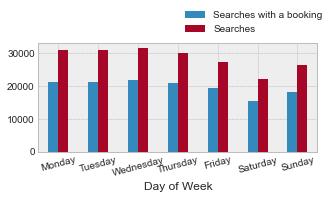

In [503]:
df_by_day_of_week = pd.merge(search_week_day_b, search_week_day, on='day_of_week_str')
df_by_day_of_week.plot.bar(x='day_of_week_str', logy=False, figsize=(5, 2))
plt.xticks(rotation=15)
plt.xlabel('Day of Week')
#plt.suptitle('Fig 5')
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 1))
plt.show()

In [140]:
print ("Booking price by week day")
search_week_day_b_price = df_booked[['gross_bookings_usd', 'day_of_week_str']].groupby(['day_of_week_str']).mean()
# search_week_day_b = pd.DataFrame(search_week_day_b)
search_week_day_b_price = search_week_day_b_price.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
search_week_day_b_price.reset_index(inplace=True)
search_week_day_b_price.rename(columns={"gross_bookings_usd": "Bookings Gross USD"}, inplace=True)
search_week_day_b_price


Booking price by week day


,day_of_week_str,Bookings Gross USD
0,Monday,391.429635
1,Tuesday,390.944310
2,Wednesday,383.991769
3,Thursday,374.745753
4,Friday,373.401496
5,Saturday,388.568886
6,Sunday,402.614701


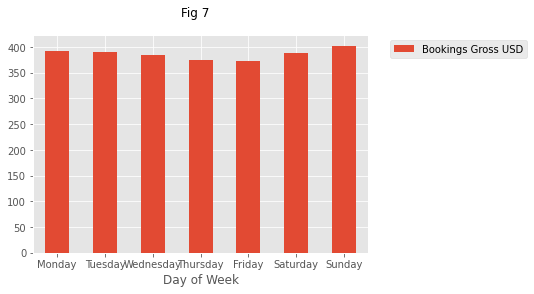

In [141]:
search_week_day_b_price.plot.bar(x='day_of_week_str', logy=False)
plt.xticks(rotation=0)
plt.xlabel('Day of Week')
plt.suptitle('Fig 7')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [100]:
print ("Searches by hour of day")
search_hour_of_day = df[['srch_id', 'hour_of_day']].groupby(['hour_of_day']).srch_id.nunique()
search_hour_of_day = pd.DataFrame(search_hour_of_day)
search_hour_of_day.reset_index(inplace=True)
search_hour_of_day.rename(columns={"srch_id": "Searches"}, inplace=True)
search_hour_of_day

Searches by hour of day


,hour_of_day,Searches
0,0,3341
1,1,2011
2,2,1442
3,3,1381
4,4,1971
5,5,3200
6,6,5306
7,7,7495
8,8,9111
9,9,10737


In [103]:
print ("Searches with a booking by hour of day")
search_hour_of_day_b = df_booked[['srch_id', 'hour_of_day']].groupby(['hour_of_day']).srch_id.nunique()
search_hour_of_day_b = pd.DataFrame(search_hour_of_day_b)
search_hour_of_day_b.reset_index(inplace=True)
search_hour_of_day_b.rename(columns={"srch_id": "Searches with a booking"}, inplace=True)
search_hour_of_day_b

Searches with a booking by hour of day


,hour_of_day,Searches with a booking
0,0,2239
1,1,1383
2,2,977
3,3,958
4,4,1418
5,5,2281
6,6,3818
7,7,5332
8,8,6509
9,9,7549


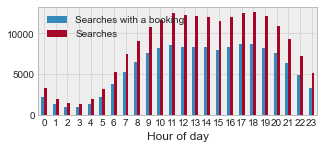

In [505]:
df_by_day_of_week = pd.merge(search_hour_of_day_b, search_hour_of_day, on='hour_of_day')
df_by_day_of_week.plot.bar(x='hour_of_day', logy=False, figsize=(5, 2))
plt.xticks(rotation=0)
plt.xlabel('Hour of day')
#plt.suptitle('Fig 6')
plt.legend(loc='upper left')
plt.show()

In [123]:
print ("Searches with a booking by month")
search_month = df_booked[['srch_id', 'month_str']].groupby(['month_str']).srch_id.nunique()
search_month = pd.DataFrame(search_month)
search_month = search_month.reindex(['November', 'December', 'January', 'February', 'March', 'April', 'May', 'June'])
search_month.reset_index(inplace=True)
search_month.rename(columns={"srch_id": "Searches with a booking"}, inplace=True)
search_month

Searches with a booking by month


,month_str,Searches with a booking
0,November,13971
1,December,13371
2,January,16011
3,February,16473
4,March,19426
5,April,17952
6,May,20078
7,June,21108


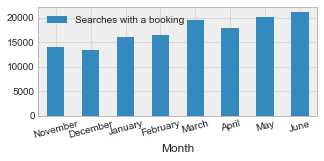

In [484]:
search_month.plot.bar(x='month_str', logy=False, figsize=(5, 2))
plt.xticks(rotation=15)
plt.xlabel('Month')
#plt.suptitle('Fig 3')
plt.legend( loc='upper left')
plt.show()

In [126]:
df_temporal = df[['srch_id', 'search_date']].groupby('search_date').count()

In [110]:
df_temporal.tail(5)

,srch_id
search_date,
2013-06-26,29551
2013-06-27,24272
2013-06-28,23920
2013-06-29,17913
2013-06-30,21886


In [115]:
df_temporal.sort_values('srch_id')

,srch_id
search_date,
2012-12-24,10738
2012-12-25,10932
2012-12-01,10974
2012-11-03,11134
2012-12-15,11391
...,...
2013-06-18,28465
2013-06-25,28695
2013-06-24,28844


In [111]:
df_temporal.describe()

,srch_id
count,242.000000
mean,20489.037190
std,4243.287837
min,10738.000000
25%,17608.500000
50%,20555.500000
75%,23914.000000
max,29551.000000


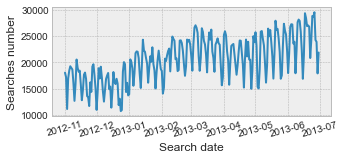

In [489]:
df_temporal.plot.line(figsize=(5, 2), legend=False)
plt.xticks(rotation=15)
plt.xlabel('Search date')
plt.ylabel('Searches number')
#plt.suptitle('Fig 4')
#plt.legend(loc='upper left')
plt.show()

In [236]:
def find_intergroup_property(df, mainprops, condprops, funcs):
    output_groups = {}
    for i, mainprop in enumerate(mainprops):
        condprop = condprops[i]
        func = funcs[i]
        propname = condprop + "_" + func
        try:
            main_index = set(df[df[mainprop] == 1].index.values)
        except:
            return output_groups
        if func == 'max_unique':
            cond_idx = df[condprop].idxmax()
            output_groups[propname] = int(main_index == cond_idx)
        elif func == 'max':
            cond_value = df[condprop].max()
            matching_index = set(df[df[condprop] == cond_value].index.values)
            output_groups[propname] = bool(len(main_index.intersection(matching_index)))
        elif func == 'min_unique':
            cond_idx = df[condprop].idxmin()
            output_groups[propname] = int(main_index == cond_idx)
        elif func == 'min':
            cond_value = df[condprop].min()
            matching_index = set(df[df[condprop] == cond_value].index.values)
            output_groups[propname] = bool(len(main_index.intersection(matching_index)))
        elif func == 'above_avg':
            mean = df[condprop].mean()
            matching_index = set(df[df[condprop] >= mean].index.values)
            output_groups[propname] = bool(len(main_index.intersection(matching_index)))
        elif func == 'below_avg':
            mean = df[condprop].mean()
            matching_index = set(df[df[condprop] < mean].index.values)
            output_groups[propname] = bool(len(main_index.intersection(matching_index)))
        elif func == 'bool':
            try:
                cond_idx = df[df[condprop] == 1].index.values
                output_groups[propname] = bool(len(main_index.intersection(matching_index)))
            except:
                None
    return output_groups

In [219]:
df_int = df[
    [
        'srch_id', 'promotion_flag', 'prop_review_score', 
        'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
        'price_usd', 'gross_bookings_usd', 'srch_query_affinity_score', 
        'booking_bool', 'click_bool'
    ]
]

df_affinity_int = df_affinity[
    [
        'srch_id', 'srch_query_affinity_score', 
        'booking_bool', 'click_bool'
    ]
]

In [202]:
booking_patterns = df_int.groupby('srch_id').apply(
    lambda x: find_intergroup_property(
        x, 
        ['booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool'], 
        ['prop_review_score', 'prop_review_score', 'promotion_flag', 'prop_location_score1', 'prop_location_score1', 'prop_location_score2', 'prop_location_score2', 'price_usd', 'price_usd', 'srch_query_affinity_score', 'srch_query_affinity_score', 'prop_brand_bool', 'prop_review_score', 'prop_review_score', 'prop_location_score1', 'prop_location_score1', 'prop_location_score2', 'prop_location_score2', 'price_usd', 'price_usd', 'srch_query_affinity_score', 'srch_query_affinity_score'], 
        ['max', 'min', 'bool', 'max', 'min', 'max', 'min', 'max', 'min', 'max', 'min', 'bool', 'above_avg', 'below_avg', 'above_avg', 'below_avg', 'above_avg', 'below_avg', 'above_avg', 'below_avg', 'above_avg', 'below_avg']
    )
)

In [237]:
clicking_patterns = df_int.groupby('srch_id').apply(
    lambda x: find_intergroup_property(
        x, 
        ['click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool', 'click_bool'], 
        ['prop_review_score', 'prop_review_score', 'promotion_flag', 'prop_location_score1', 'prop_location_score1', 'prop_location_score2', 'prop_location_score2', 'price_usd', 'price_usd', 'srch_query_affinity_score', 'srch_query_affinity_score', 'prop_brand_bool', 'prop_review_score', 'prop_review_score', 'prop_location_score1', 'prop_location_score1', 'prop_location_score2', 'prop_location_score2', 'price_usd', 'price_usd', 'srch_query_affinity_score', 'srch_query_affinity_score'], 
        ['max', 'min', 'bool', 'max', 'min', 'max', 'min', 'max', 'min', 'max', 'min', 'bool', 'above_avg', 'below_avg', 'above_avg', 'below_avg', 'above_avg', 'below_avg', 'above_avg', 'below_avg', 'above_avg', 'below_avg']
    )
)

In [220]:
booking_patterns_affinity = df_affinity_int.groupby('srch_id').apply(
    lambda x: find_intergroup_property(
        x, 
        ['booking_bool', 'booking_bool', 'booking_bool', 'booking_bool'], 
        ['srch_query_affinity_score', 'srch_query_affinity_score', 'srch_query_affinity_score', 'srch_query_affinity_score'], 
        ['max', 'min','above_avg', 'below_avg']
    )
)

In [239]:
clicking_patterns_affinity = df_affinity_int.groupby('srch_id').apply(
    lambda x: find_intergroup_property(
        x, 
        ['click_bool', 'click_bool', 'click_bool', 'click_bool'], 
        ['srch_query_affinity_score', 'srch_query_affinity_score', 'srch_query_affinity_score', 'srch_query_affinity_score'], 
        ['max', 'min','above_avg', 'below_avg']
    )
)

In [206]:
booking_patterns_res = pd.DataFrame(booking_patterns)
booking_patterns_res.rename(columns={0: 'prop'}, inplace=True)
booking_patterns_res = booking_patterns_res['prop'].apply(pd.Series, dtype='bool')

In [226]:
booking_patterns_res.dropna(axis='rows', subset=['promotion_flag_bool'], inplace=False)

,prop_review_score_max,prop_review_score_min,promotion_flag_bool,prop_location_score1_max,prop_location_score1_min,prop_location_score2_max,prop_location_score2_min,price_usd_max,price_usd_min,srch_query_affinity_score_max,...,prop_review_score_above_avg,prop_review_score_below_avg,prop_location_score1_above_avg,prop_location_score1_below_avg,prop_location_score2_above_avg,prop_location_score2_below_avg,price_usd_above_avg,price_usd_below_avg,srch_query_affinity_score_above_avg,srch_query_affinity_score_below_avg
srch_id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,False,False,True,False,False
21,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,True,False,False
25,False,False,False,True,False,False,False,False,False,False,...,True,False,True,False,True,False,False,True,False,False
28,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332774,True,False,False,False,True,False,True,False,False,False,...,True,False,False,True,False,True,False,True,False,False
332776,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,True,False,False,False
332781,False,False,False,False,True,True,True,False,False,True,...,True,False,False,True,True,False,True,False,True,False


In [221]:
booking_patterns_aff_res = pd.DataFrame(booking_patterns_affinity)
booking_patterns_aff_res.rename(columns={0: 'prop'}, inplace=True)
booking_patterns_aff_res = booking_patterns_aff_res['prop'].apply(pd.Series, dtype='bool')

In [214]:
booking_patterns_res.dropna(axis='rows', subset=['prop_review_score_max'], inplace=True)
total_bp = len(booking_patterns_res)
print(total_bp)

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_review_score_max'] == 1])
print("Number of booked hotels with the highest user review score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_review_score_min'] == 1])
print("Number of booked hotels with the minimum user review score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_review_score_above_avg'] == 1])
print("Number of booked hotels with an above average user review score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_review_score_below_avg'] == 1])
print("Number of booked hotels with a below average user review score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['promotion_flag_bool'] == 1])
print("Number of booked hotels with a promotion among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score1_max'] == 1])
print("Number of booked hotels with the maximum location score 1 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score1_min'] == 1])
print("Number of booked hotels with the minimum location score 1 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score1_above_avg'] == 1])
print("Number of booked hotels with an above average location score 1 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score1_below_avg'] == 1])
print("Number of booked hotels with a below average location score 1 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score2_max'] == 1])
print("Number of booked hotels with the maximum location score 2 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score2_min'] == 1])
print("Number of booked hotels with the minimum location score 2 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()


reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score2_above_avg'] == 1])
print("Number of booked hotels with an above average location score 2 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score2_below_avg'] == 1])
print("Number of booked hotels with a below average location score 2 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['price_usd_min'] == 1])
print("Number of booked hotels with the minimum USD price among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['price_usd_max'] == 1])
print("Number of booked hotels with the maximum USD price among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()



reduced_bp = len(booking_patterns_res[booking_patterns_res['price_usd_below_avg'] == 1])
print("Number of booked hotels with a below avg USD price among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['price_usd_above_avg'] == 1])
print("Number of booked hotels with an above avg USD price among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_brand_bool_bool'] == 1])
print("Number of booked hotels being of a hotel brand")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()


138390
Number of booked hotels with the highest user review score among results
24764
17.894356528650913

Number of booked hotels with the minimum user review score among results
10234
7.3950429944360145

Number of booked hotels with an above average user review score among results
92631
66.93474962063732

Number of booked hotels with a below average user review score among results
45643
32.98142929402413

Number of booked hotels with a promotion among results
9229
6.668834453356457

Number of booked hotels with the maximum location score 1 among results
17853
12.900498590938653

Number of booked hotels with the minimum location score 1 among results
10872
7.856058963797963

Number of booked hotels with an above average location score 1 among results
89638
64.77202109979045

Number of booked hotels with a below average location score 1 among results
48752
35.22797890020955

Number of booked hotels with the maximum location score 2 among results
19229
13.894790085988873

Number of booke

In [223]:
booking_patterns_aff_res.dropna(axis='rows', subset=['srch_query_affinity_score_min'], inplace=True)
booking_patterns_aff_res

,srch_query_affinity_score_max,srch_query_affinity_score_min,srch_query_affinity_score_above_avg,srch_query_affinity_score_below_avg
srch_id,,,,
66,False,False,True,False
74,False,False,True,False
82,False,False,True,False
165,True,False,True,False
225,False,False,True,False
...,...,...,...,...
332671,False,False,True,False
332677,False,False,False,True
332712,False,False,True,False


In [224]:
total_bp = len(booking_patterns_aff_res)
reduced_bp = len(booking_patterns_aff_res[booking_patterns_aff_res['srch_query_affinity_score_min'] == 1])
print("Number of booked hotels with the minimum affinity score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_aff_res[booking_patterns_aff_res['srch_query_affinity_score_max'] == 1])
print("Number of booked hotels with the maximum affinity score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()


reduced_bp = len(booking_patterns_aff_res[booking_patterns_aff_res['srch_query_affinity_score_below_avg'] == 1])
print("Number of booked hotels with a below avg affinity score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_aff_res[booking_patterns_aff_res['srch_query_affinity_score_above_avg'] == 1])
print("Number of booked hotels with an above avg affinity score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

Number of booked hotels with the minimum affinity score among results
199
1.8282039503904457

Number of booked hotels with the maximum affinity score among results
2169
19.9265043638034

Number of booked hotels with a below avg affinity score among results
2228
20.46853468075333

Number of booked hotels with an above avg affinity score among results
8657
79.53146531924668



In [156]:
df[df['srch_id'] == 332785][['srch_id', 'booking_bool', 'prop_review_score']]

,srch_id,booking_bool,prop_review_score
4958341,332785,0,1.0
4958342,332785,0,4.0
4958343,332785,0,4.0
4958344,332785,0,3.5
4958345,332785,1,5.0
4958346,332785,0,2.5


In [240]:
clicking_patterns_res = pd.DataFrame(clicking_patterns)
clicking_patterns_res.rename(columns={0: 'prop'}, inplace=True)
clicking_patterns_res = clicking_patterns_res['prop'].apply(pd.Series, dtype='bool')

In [245]:
clicking_patterns_res.groupby('srch_id').count()

,prop_review_score_max,prop_review_score_min,promotion_flag_bool,prop_location_score1_max,prop_location_score1_min,prop_location_score2_max,prop_location_score2_min,price_usd_max,price_usd_min,srch_query_affinity_score_max,...,prop_review_score_above_avg,prop_review_score_below_avg,prop_location_score1_above_avg,prop_location_score1_below_avg,prop_location_score2_above_avg,prop_location_score2_below_avg,price_usd_above_avg,price_usd_below_avg,srch_query_affinity_score_above_avg,srch_query_affinity_score_below_avg
srch_id,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
11,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332777,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
332781,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
332782,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [241]:
clicking_patterns_aff_res = pd.DataFrame(clicking_patterns_affinity)
clicking_patterns_aff_res.rename(columns={0: 'prop'}, inplace=True)
clicking_patterns_aff_res = clicking_patterns_aff_res['prop'].apply(pd.Series, dtype='bool')

In [242]:
clicking_patterns_res.dropna(axis='rows', subset=['prop_review_score_max'], inplace=True)
total_bp = len(clicking_patterns_res)
print(total_bp)

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['prop_review_score_max'] == 1])
print("Number of booked hotels with the highest user review score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['prop_review_score_min'] == 1])
print("Number of booked hotels with the minimum user review score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['prop_review_score_above_avg'] == 1])
print("Number of booked hotels with an above average user review score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['prop_review_score_below_avg'] == 1])
print("Number of booked hotels with a below average user review score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['promotion_flag_bool'] == 1])
print("Number of booked hotels with a promotion among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['prop_location_score1_max'] == 1])
print("Number of booked hotels with the maximum location score 1 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['prop_location_score1_min'] == 1])
print("Number of booked hotels with the minimum location score 1 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['prop_location_score1_above_avg'] == 1])
print("Number of booked hotels with an above average location score 1 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['prop_location_score1_below_avg'] == 1])
print("Number of booked hotels with a below average location score 1 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['prop_location_score2_max'] == 1])
print("Number of booked hotels with the maximum location score 2 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['prop_location_score2_min'] == 1])
print("Number of booked hotels with the minimum location score 2 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()


reduced_bp = len(clicking_patterns_res[clicking_patterns_res['prop_location_score2_above_avg'] == 1])
print("Number of booked hotels with an above average location score 2 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['prop_location_score2_below_avg'] == 1])
print("Number of booked hotels with a below average location score 2 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['price_usd_min'] == 1])
print("Number of booked hotels with the minimum USD price among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['price_usd_max'] == 1])
print("Number of booked hotels with the maximum USD price among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()



reduced_bp = len(clicking_patterns_res[clicking_patterns_res['price_usd_below_avg'] == 1])
print("Number of booked hotels with a below avg USD price among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['price_usd_above_avg'] == 1])
print("Number of booked hotels with an above avg USD price among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_res[clicking_patterns_res['prop_brand_bool_bool'] == 1])
print("Number of booked hotels being of a hotel brand")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()


199795
Number of booked hotels with the highest user review score among results
37637
18.837808753972823

Number of booked hotels with the minimum user review score among results
17990
9.004229335068445

Number of booked hotels with an above average user review score among results
135636
67.88758477439374

Number of booked hotels with a below average user review score among results
69685
34.87825020646162

Number of booked hotels with a promotion among results
17990
9.004229335068445

Number of booked hotels with the maximum location score 1 among results
26021
13.023849445681822

Number of booked hotels with the minimum location score 1 among results
18000
9.00923446532696

Number of booked hotels with an above average location score 1 among results
129518
64.8254460822343

Number of booked hotels with a below average location score 1 among results
76302
38.190144898520984

Number of booked hotels with the maximum location score 2 among results
27202
13.614955329212442

Number of book

In [ ]:
clicking_patterns_aff_res.dropna(axis='rows', subset=['srch_query_affinity_score_min'], inplace=True)
clicking_patterns_aff_res

In [246]:
total_bp = len(clicking_patterns_aff_res)
reduced_bp = len(clicking_patterns_aff_res[clicking_patterns_aff_res['srch_query_affinity_score_min'] == 1])
print("Number of booked hotels with the minimum affinity score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_aff_res[clicking_patterns_aff_res['srch_query_affinity_score_max'] == 1])
print("Number of booked hotels with the maximum affinity score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()


reduced_bp = len(clicking_patterns_aff_res[clicking_patterns_aff_res['srch_query_affinity_score_below_avg'] == 1])
print("Number of booked hotels with a below avg affinity score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(clicking_patterns_aff_res[clicking_patterns_aff_res['srch_query_affinity_score_above_avg'] == 1])
print("Number of booked hotels with an above avg affinity score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

Number of booked hotels with the minimum affinity score among results
317
2.330882352941176

Number of booked hotels with the maximum affinity score among results
2573
18.919117647058822

Number of booked hotels with a below avg affinity score among results
2858
21.014705882352942

Number of booked hotels with an above avg affinity score among results
10290
75.66176470588235



In [340]:
df_visitor_hist_tot_useful = df_visitor_hist_tot[(df_visitor_hist_tot['click_bool'] == 1) | (df_visitor_hist_tot['booking_bool'] == 1)]
#df_visitor_hist_tot_useful = df_visitor_hist_tot[(df_visitor_hist_tot['click_bool'] == 1)]
df_visitor_hist_tot_useful = df_visitor_hist_tot_useful[[
    'srch_id', 'click_bool', 'booking_bool', 'price_usd', 'prop_review_score', # 'srch_query_affinity_score',
    'promotion_flag', 'prop_location_score1', 'prop_location_score2', 'prop_starrating', 'visitor_hist_starrating', 
    'visitor_hist_adr_usd'
]]



In [341]:
df_visitor_hist_tot_useful

,srch_id,click_bool,booking_bool,price_usd,prop_review_score,promotion_flag,prop_location_score1,prop_location_score2,prop_starrating,visitor_hist_starrating,visitor_hist_adr_usd
568,47,1,1,153.50,4.0,0,3.14,0.0839,4,4.31,180.75
586,49,1,1,115.24,4.5,0,6.42,0.7886,4,2.50,270.08
1082,80,1,1,127.00,3.5,0,2.64,0.5445,4,2.50,122.34
1206,87,1,1,96.65,4.0,0,0.69,0.5935,4,3.74,210.60
1560,108,1,0,229.26,4.0,0,3.40,0.0229,3,3.35,229.18
...,...,...,...,...,...,...,...,...,...,...,...
4957543,332723,1,1,94.00,4.0,0,2.48,0.1053,3,3.39,143.18
4957713,332732,1,1,200.00,4.5,0,1.61,0.0664,3,2.63,117.68
4958187,332768,1,1,116.00,3.5,1,1.79,0.0444,3,3.75,194.22
4958201,332772,1,1,147.50,3.5,0,2.20,0.5753,4,4.05,169.85


AttributeError: 'QuadMesh' object has no property 'figsize'

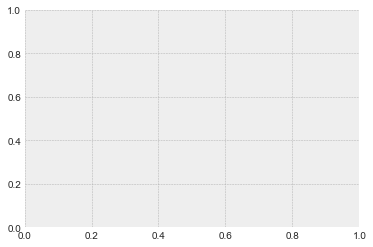

In [506]:
usr_corr_result = df_visitor_hist_tot_useful.corr(method='pearson').iloc[[9, 10]][['price_usd', 'prop_review_score', 'prop_location_score1', 'prop_starrating']].rename(columns={
    "price_usd": "Hotel Price", 
    "prop_review_score": "Hotel User Rating",
    "prop_location_score1": "Hotel Location Score 1",
    "prop_starrating": "Hotel Star Rating"
}, index={
    "visitor_hist_starrating": "User history of hotels star rating",
    "visitor_hist_adr_usd": "User history of hotels price per night"
})


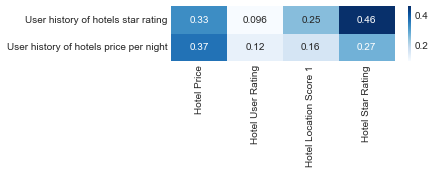

In [513]:
fig, ax = plt.subplots(figsize=(5,1))
sns.heatmap(usr_corr_result, cmap="Blues", annot=True, ax=ax)
#plt.suptitle('Fig 9')
plt.show()

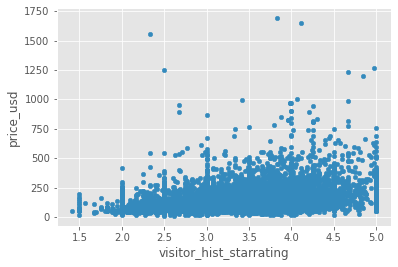

In [353]:
df_visitor_hist_tot_useful.plot.scatter('visitor_hist_starrating', 'price_usd')
plt.show()

In [349]:
df_n_random[[
    'srch_id', 'click_bool', 'booking_bool', 'price_usd', 'prop_review_score', # 'srch_query_affinity_score',
    'promotion_flag', 'prop_location_score1', 'prop_location_score2', 'prop_starrating', 'visitor_hist_starrating', 
    'visitor_hist_adr_usd', 'position'
]].corr(method='spearman').iloc[[11]]
# .iloc[[9, 10]][['price_usd', 'prop_review_score', 'prop_location_score1', 'prop_starrating']].rename(columns={
#     "price_usd": "Hotel Price", 
#     "prop_review_score": "Hotel User Rating",
#     "prop_location_score1": "Hotel Location Score 1",
#     "prop_starrating": "Hotel Star Rating"
# }, index={
#     "visitor_hist_starrating": "User history of hotels star rating",
#     "visitor_hist_adr_usd": "User history of hotels price per night"
# })

,srch_id,click_bool,booking_bool,price_usd,prop_review_score,promotion_flag,prop_location_score1,prop_location_score2,prop_starrating,visitor_hist_starrating,visitor_hist_adr_usd,position
position,-0.001925,-0.191174,-0.183519,-0.056384,-0.083252,-0.14542,-0.006093,-0.262464,-0.136042,-0.011753,-0.00703,1.0


In [426]:
df_hotels_total = pd.concat([
    df[
        ['prop_id', 'srch_id', 'prop_location_score1', 'prop_location_score2', 'prop_starrating', 'price_usd', 'prop_review_score',
        'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 
        'srch_saturday_night_bool', 'promotion_flag']
    ], 
    df_test[
        ['prop_id', 'srch_id', 'prop_location_score1', 'prop_location_score2', 'prop_starrating', 'price_usd', 'prop_review_score',
        'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 
        'srch_saturday_night_bool', 'promotion_flag']
    ]
])



In [428]:
df_hotels_total_g = df_hotels_total.groupby('prop_id').agg({
    'srch_id': pd.Series.nunique,
    'prop_location_score1': [np.mean, np.std, np.median],
    'prop_location_score2': [np.mean, np.std, np.median],
    'prop_starrating': [np.mean, np.std, np.median],
    'price_usd': [np.mean, np.std, np.median],
    'prop_review_score': [np.mean, np.std, np.median],
    'srch_length_of_stay': [np.mean, np.std, np.median],
    'srch_booking_window': [np.mean, np.std, np.median],
    'srch_adults_count': [np.mean, np.std, np.median],
    'srch_children_count': [np.mean, np.std, np.median],
    'srch_room_count': [np.mean, np.std, np.median],
    'srch_saturday_night_bool': 'sum',
    'promotion_flag': 'sum'
})


In [430]:
df_hotels_total_g.columns = ["_".join(x) for x in df_hotels_total_g.columns.ravel()]
df_hotels_total_g

/var/folders/5q/75t4z1sd6vg5lq56p9vh1cgm0000gn/T/ipykernel_86858/3457860172.py:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  df_hotels_total_g.columns = ["_".join(x) for x in df_hotels_total_g.columns.ravel()]


,srch_id_nunique,prop_location_score1_mean,prop_location_score1_std,prop_location_score1_median,prop_location_score2_mean,prop_location_score2_std,prop_location_score2_median,prop_starrating_mean,prop_starrating_std,prop_starrating_median,...,srch_adults_count_std,srch_adults_count_median,srch_children_count_mean,srch_children_count_std,srch_children_count_median,srch_room_count_mean,srch_room_count_std,srch_room_count_median,srch_saturday_night_bool_sum,promotion_flag_sum
prop_id,,,,,,,,,,,,,,,,,,,,,
1,123,3.04,0.0,3.04,NaN,NaN,NaN,2.0,0.0,2.0,...,0.821866,2.0,0.341463,0.818127,0.0,1.130081,0.613500,1.0,71,0
2,29,0.69,0.0,0.69,0.066790,0.165269,0.0361,0.0,0.0,0.0,...,0.580895,2.0,0.241379,0.635563,0.0,1.000000,0.000000,1.0,15,0
3,172,0.69,0.0,0.69,0.026578,0.046367,0.0227,3.0,0.0,3.0,...,0.863214,2.0,0.372093,0.734234,0.0,1.093023,0.310740,1.0,111,1
4,42,4.88,0.0,4.88,0.115500,0.000000,0.1155,5.0,0.0,5.0,...,0.348383,2.0,0.238095,0.532345,0.0,1.023810,0.154303,1.0,5,12
5,52,6.02,0.0,6.02,NaN,NaN,NaN,0.0,0.0,0.0,...,1.039201,2.0,0.711538,0.914728,0.0,1.096154,0.357530,1.0,29,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140817,6,4.43,0.0,4.43,0.143200,0.000000,0.1432,2.0,0.0,2.0,...,0.000000,2.0,1.166667,1.471960,0.5,1.000000,0.000000,1.0,5,0
140818,8,4.17,0.0,4.17,0.068500,0.000000,0.0685,3.0,0.0,3.0,...,0.353553,2.0,0.000000,0.000000,0.0,1.000000,0.000000,1.0,2,0
140819,12,5.37,0.0,5.37,0.106100,0.000000,0.1061,3.0,0.0,3.0,...,0.717741,2.0,0.333333,0.651339,0.0,1.000000,0.000000,1.0,3,3


In [437]:
df_hotels_info = df_hotels_total_g.reset_index()
df_hotels_info
# reset index
# do a join of both datasets on prop_id
# fill NaN with 0 


,prop_id,srch_id_nunique,prop_location_score1_mean,prop_location_score1_std,prop_location_score1_median,prop_location_score2_mean,prop_location_score2_std,prop_location_score2_median,prop_starrating_mean,prop_starrating_std,...,srch_adults_count_std,srch_adults_count_median,srch_children_count_mean,srch_children_count_std,srch_children_count_median,srch_room_count_mean,srch_room_count_std,srch_room_count_median,srch_saturday_night_bool_sum,promotion_flag_sum
0,1,123,3.04,0.0,3.04,NaN,NaN,NaN,2.0,0.0,...,0.821866,2.0,0.341463,0.818127,0.0,1.130081,0.613500,1.0,71,0
1,2,29,0.69,0.0,0.69,0.066790,0.165269,0.0361,0.0,0.0,...,0.580895,2.0,0.241379,0.635563,0.0,1.000000,0.000000,1.0,15,0
2,3,172,0.69,0.0,0.69,0.026578,0.046367,0.0227,3.0,0.0,...,0.863214,2.0,0.372093,0.734234,0.0,1.093023,0.310740,1.0,111,1
3,4,42,4.88,0.0,4.88,0.115500,0.000000,0.1155,5.0,0.0,...,0.348383,2.0,0.238095,0.532345,0.0,1.023810,0.154303,1.0,5,12
4,5,52,6.02,0.0,6.02,NaN,NaN,NaN,0.0,0.0,...,1.039201,2.0,0.711538,0.914728,0.0,1.096154,0.357530,1.0,29,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136881,140817,6,4.43,0.0,4.43,0.143200,0.000000,0.1432,2.0,0.0,...,0.000000,2.0,1.166667,1.471960,0.5,1.000000,0.000000,1.0,5,0
136882,140818,8,4.17,0.0,4.17,0.068500,0.000000,0.0685,3.0,0.0,...,0.353553,2.0,0.000000,0.000000,0.0,1.000000,0.000000,1.0,2,0
136883,140819,12,5.37,0.0,5.37,0.106100,0.000000,0.1061,3.0,0.0,...,0.717741,2.0,0.333333,0.651339,0.0,1.000000,0.000000,1.0,3,3
136884,140820,39,3.87,0.0,3.87,NaN,NaN,NaN,4.0,0.0,...,0.338688,2.0,0.051282,0.223456,0.0,1.000000,0.000000,1.0,8,0


In [439]:
df_new_training = df.join(df_hotels_info, on='prop_id',  how='left', rsuffix='_extra')
df_new_training

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_adults_count_std,srch_adults_count_median,srch_children_count_mean,srch_children_count_std,srch_children_count_median,srch_room_count_mean,srch_room_count_std,srch_room_count_median,srch_saturday_night_bool_sum,promotion_flag_sum
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,0.577350,1.5,0.000000,0.000000,0.0,1.000000,0.000000,1.0,3.0,0.0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,0.739074,2.0,0.263158,0.446258,0.0,1.263158,0.446258,1.0,22.0,1.0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,0.610827,2.0,0.342857,0.802308,0.0,1.057143,0.235504,1.0,21.0,26.0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,0.640325,2.0,0.211180,0.529268,0.0,1.049689,0.244981,1.0,64.0,5.0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,0.000000,2.0,0.000000,0.000000,0.0,1.000000,0.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,77700,3,4.0,...,0.657468,2.0,0.235294,0.654070,0.0,1.000000,0.000000,1.0,17.0,0.0
4958343,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,88083,3,4.0,...,NaN,2.0,0.000000,NaN,0.0,1.000000,NaN,1.0,0.0,0.0
4958344,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,94508,3,3.5,...,NaN,3.0,0.000000,NaN,0.0,1.000000,NaN,1.0,1.0,0.0
4958345,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,128360,3,5.0,...,0.833333,2.0,1.222222,1.301708,1.0,1.222222,0.440959,1.0,0.0,2.0


In [440]:
df_new_training.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [441]:
df_new_test = df_test.join(df_hotels_info, on='prop_id',  how='left', rsuffix='_extra')
df_new_test

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_adults_count_std,srch_adults_count_median,srch_children_count_mean,srch_children_count_std,srch_children_count_median,srch_room_count_mean,srch_room_count_std,srch_room_count_median,srch_saturday_night_bool_sum,promotion_flag_sum
0,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,3180,3,4.5,...,0.912908,2.0,0.380567,0.770202,0.0,1.107287,0.358365,1.0,253.0,0.0
1,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,5543,3,4.5,...,0.500000,2.0,0.000000,0.000000,0.0,1.000000,0.000000,1.0,3.0,0.0
2,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,14142,2,3.5,...,0.539360,2.0,0.181818,0.404520,0.0,1.000000,0.000000,1.0,4.0,0.0
3,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,22393,3,4.5,...,1.345185,2.0,0.571429,0.786796,0.0,1.000000,0.000000,1.0,0.0,0.0
4,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,24194,3,4.5,...,0.000000,2.0,0.250000,0.500000,0.0,1.000000,0.000000,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959178,332787,2013-05-21 11:06:37,24,216,NaN,NaN,117,32019,4,3.5,...,0.807600,2.0,0.156250,0.368902,0.0,1.125000,0.336011,1.0,19.0,32.0
4959179,332787,2013-05-21 11:06:37,24,216,NaN,NaN,117,33959,4,3.0,...,0.534522,2.0,0.428571,0.786796,0.0,1.000000,0.000000,1.0,3.0,0.0
4959180,332787,2013-05-21 11:06:37,24,216,NaN,NaN,117,35240,4,0.0,...,0.831209,2.0,0.181818,0.404520,0.0,1.181818,0.404520,1.0,8.0,4.0
4959181,332787,2013-05-21 11:06:37,24,216,NaN,NaN,117,94437,4,0.0,...,0.467099,2.0,0.272727,0.467099,0.0,1.000000,0.000000,1.0,3.0,0.0


In [450]:
df_new_test['day_of_week'] = df_new_test['search_date'].apply(lambda x: x.weekday())
df_new_test['day_of_week_str'] = df_new_test['search_date'].apply(lambda x: x.strftime('%A'))
df_new_test['month_str'] = df_new_test['search_date'].apply(lambda x: x.strftime('%B'))
df_new_test['hour_of_day'] = df_new_test['search_time'].apply(lambda x: x.hour)

In [451]:
df_new_test.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv

In [443]:
df_new_training.to_csv('./data/train_set.csv', index=False)

In [452]:
df_new_test.to_csv('./data/test_set.csv', index=False)

In [406]:
df_train_hotels = df[
    ['prop_id', 'srch_id', 'prop_location_score1', 'prop_location_score2', 'prop_starrating', 'price_usd', 'prop_review_score',
    'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count',
    'click_bool', 'booking_bool']
].groupby('prop_id').agg({
    'srch_id': pd.Series.nunique,
    'prop_location_score1': [np.mean, np.std, np.median],
    'prop_location_score2': [np.mean, np.std, np.median],
    'prop_starrating': [np.mean, np.std, np.median],
    'price_usd': [np.mean, np.std, np.median],
    'prop_review_score': [np.mean, np.std, np.median],
    'srch_length_of_stay': [np.mean, np.std, np.median],
    'srch_booking_window': [np.mean, np.std, np.median],
    'srch_adults_count': [np.mean, np.std, np.median],
    'srch_children_count': [np.mean, np.std, np.median],
    'srch_room_count': [np.mean, np.std, np.median],
    'click_bool': 'sum',
    'booking_bool': 'sum'
})
df_train_hotels.columns = ["_".join(x) for x in df_train_hotels.columns.ravel()]


/var/folders/5q/75t4z1sd6vg5lq56p9vh1cgm0000gn/T/ipykernel_86858/1041683498.py:20: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  df_train_hotels.columns = ["_".join(x) for x in df_train_hotels.columns.ravel()]


In [407]:
df_train_hotels.describe()

,srch_id_nunique,prop_location_score1_mean,prop_location_score1_std,prop_location_score1_median,prop_location_score2_mean,prop_location_score2_std,prop_location_score2_median,prop_starrating_mean,prop_starrating_std,prop_starrating_median,...,srch_adults_count_std,srch_adults_count_median,srch_children_count_mean,srch_children_count_std,srch_children_count_median,srch_room_count_mean,srch_room_count_std,srch_room_count_median,click_bool_sum,booking_bool_sum
count,129113.000000,129113.000000,116245.0,129113.000000,99054.000000,89805.000000,99054.000000,129113.000000,116245.0,129113.000000,...,116245.000000,129113.000000,129113.000000,116245.000000,129113.000000,129113.000000,116245.000000,129113.000000,129113.000000,129113.000000
mean,38.403158,2.405038,0.0,2.405038,0.133708,0.056980,0.125626,2.816610,0.0,2.816610,...,0.651805,1.909874,0.287332,0.519368,0.080294,1.085773,0.242715,1.011482,1.718487,1.071852
std,81.888119,1.624361,0.0,1.624361,0.153283,0.080783,0.166482,1.325735,0.0,1.325735,...,0.374353,0.342464,0.307645,0.349978,0.297954,0.149740,0.273193,0.112729,4.696300,3.181654
min,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,4.000000,1.100000,0.0,1.100000,0.024065,0.000000,0.012400,2.000000,0.0,2.000000,...,0.483046,2.000000,0.000000,0.316228,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,12.000000,2.300000,0.0,2.300000,0.079180,0.020984,0.057100,3.000000,0.0,3.000000,...,0.640299,2.000000,0.235294,0.533712,0.000000,1.030303,0.235702,1.000000,0.000000,0.000000
75%,40.000000,3.530000,0.0,3.530000,0.188122,0.083920,0.173000,4.000000,0.0,4.000000,...,0.854850,2.000000,0.409836,0.743223,0.000000,1.126374,0.404520,1.000000,2.000000,1.000000
max,2357.000000,6.980000,0.0,6.980000,1.000000,0.704561,1.000000,5.000000,0.0,5.000000,...,4.949747,9.000000,4.500000,4.618802,4.500000,8.000000,4.242641,8.000000,245.000000,159.000000


In [410]:
df_train_hotels.columns

Index(['srch_id_nunique', 'prop_location_score1_mean',
       'prop_location_score1_std', 'prop_location_score1_median',
       'prop_location_score2_mean', 'prop_location_score2_std',
       'prop_location_score2_median', 'prop_starrating_mean',
       'prop_starrating_std', 'prop_starrating_median', 'price_usd_mean',
       'price_usd_std', 'price_usd_median', 'prop_review_score_mean',
       'prop_review_score_std', 'prop_review_score_median',
       'srch_length_of_stay_mean', 'srch_length_of_stay_std',
       'srch_length_of_stay_median', 'srch_booking_window_mean',
       'srch_booking_window_std', 'srch_booking_window_median',
       'srch_adults_count_mean', 'srch_adults_count_std',
       'srch_adults_count_median', 'srch_children_count_mean',
       'srch_children_count_std', 'srch_children_count_median',
       'srch_room_count_mean', 'srch_room_count_std', 'srch_room_count_median',
       'click_bool_sum', 'booking_bool_sum'],
      dtype='object')

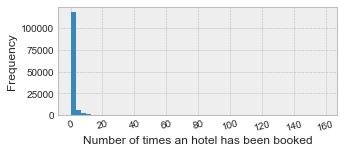

In [517]:
df_train_hotels[['booking_bool_sum']].hist(bins=50, figsize=(5, 2))

plt.xticks(rotation=15)
plt.xlabel('Number of times an hotel has been booked')
plt.ylabel('Frequency')
#plt.legend(loc='lower right', bbox_to_anchor=(1.05, 1))

#plt.suptitle('fig 11')
plt.title('')
plt.show()

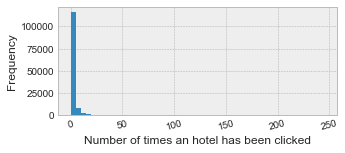

In [518]:
df_train_hotels[['click_bool_sum']].hist(bins=50, figsize=(5, 2))
plt.xticks(rotation=15)
plt.xlabel('Number of times an hotel has been clicked')
plt.ylabel('Frequency')
#plt.suptitle('fig 11')
plt.title('')
plt.show()

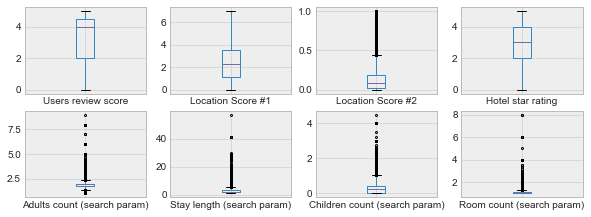

In [559]:
multi_boxplot_tmp = df_train_hotels[[
    'prop_review_score_mean', 
    'prop_location_score1_mean', 
    'prop_location_score2_mean', 
    'prop_starrating_mean',
    'srch_adults_count_mean', 
    'srch_length_of_stay_mean', 
    'srch_booking_window_mean', 
    'srch_children_count_mean', 
    'srch_room_count_mean'
]].rename(columns={
    'prop_review_score_mean': 'Users review score',
    'prop_location_score1_mean': 'Location Score #1',
    'prop_location_score2_mean': 'Location Score #2',
    'prop_starrating_mean': 'Hotel star rating',
    'srch_adults_count_mean': 'Adults count (search param)',
    'srch_length_of_stay_mean': 'Stay length (search param)',
    'srch_children_count_mean': 'Children count (search param)',
    'srch_room_count_mean': 'Room count (search param)'
})

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,3.5))

flierprops={'markersize': 2}
multi_boxplot_tmp.boxplot(column='Users review score', meanline=True, ax=axes[0,0], figsize=(2,2))
multi_boxplot_tmp.boxplot(column='Location Score #1', meanline=True, ax=axes[0,1], figsize=(2,2))
multi_boxplot_tmp.boxplot(column='Location Score #2', meanline=True, ax=axes[0,2], figsize=(2,2), flierprops=flierprops)
multi_boxplot_tmp.boxplot(column='Hotel star rating', meanline=True, ax=axes[0,3], figsize=(2,2))
multi_boxplot_tmp.boxplot(column='Adults count (search param)', meanline=True, ax=axes[1,0], figsize=(2,2),flierprops=flierprops)
multi_boxplot_tmp.boxplot(column='Stay length (search param)', meanline=True, ax=axes[1,1], figsize=(2,2),flierprops=flierprops)
multi_boxplot_tmp.boxplot(column='Children count (search param)', meanline=True, ax=axes[1,2], figsize=(2,2),flierprops=flierprops)
multi_boxplot_tmp.boxplot(column='Room count (search param)', meanline=True, ax=axes[1,3], figsize=(2,2), flierprops=flierprops)

#plt.suptitle('fig 12')
plt.show()

In [411]:
df_test_hotels = df_test[
    ['prop_id', 'srch_id', 'prop_location_score1', 'prop_location_score2', 'prop_starrating', 'price_usd', 'prop_review_score',
    'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count']
].groupby('prop_id').agg({
    'srch_id': pd.Series.nunique
})

In [359]:
df_test_hotels

,srch_id
prop_id,
1,62
2,18
3,90
4,20
5,22
...,...
140817,3
140818,5
140819,10


In [361]:
len(set(df_train_hotels.index.values).intersection(set(df_test_hotels.index.values)))

121665

In [453]:
df_new_training_t = pd.read_csv('./data/train_set.csv')
df_new_test_t = pd.read_csv('./data/test_set.csv')

In [454]:
df_new_training_t.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [455]:
df_new_test_t.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv

# Paper

## Introduction

## Dataset

In order to predict the likelihood of users to book an hotel which follows the characteristics that they are showing, we must first look into the data. In our training set we have two key features for each search: the hotels which the user booked and clicked. The latter directly represents the decision of the user or their interest related to their query. Hence, we performed an exploratory data analysis around these two key features in order to try to find patterns or engineer features that would help our methods to perform better. 

### Raw features and missing data

### Searches Analysis

We found that in the training set there are 199795 searches during 242 days spanning from 2012-11-01 until 2013-06-30. Searches have a minimum of 5 results and a maximum of 38 results. The mean of results per search is 24.81 with an standard deviation of 9.11. As seen on Fig 1, most of the searches output more than 29 results. All searched had at least one click given by the user among the results. However, not all the searches had a booking. A total of 138390 (69.26%) searches in the training set resulted in a booking. We found that for every search there is no more than one booking and there is at least one click. Most of the searches has at most one click. However, there are a few searches with more than one click (only 6.52%). On average, users click on 1.11 hotels from their search with and standard deviation of 0.56. Figure 8 shows the distribution of clicks per search.

**Geographic Analysis**: Visitors countries are variate. A total of 210 countries are found. The world has a total of 195 countries. Hence, we hiphotesize that Expedia maybe subdivides big countries by region. The maximum number of searches in a country is 114186. The mininum number of searches is 1. Since countries are mapped as IDs we are not able to recognize which are these specific countries. On the other hand, visitors searched for 18127 different destinations. The minimum nummber of times a destination was searched is 1 and the maximum is 2464. However, most destinations (75%) where searched only 6 times. The latter hinted us that destinations searches are very variant. This can be further seen on Fig 2. 

**Temporal Analysis**: In average, 20489 searches are done per day with an standard deviation of 4243. The day of the least amount of searches with a booking is Christmas eve (2012-12-24) with 10738 bookings, followed by Christmas (2012-12-25) with 10932 bookings. In general December is the month with the least amount of searches and June the one with the most amount of searches. However, the latter could be due to the growth of the platform instead of a user behavioural pattern. This can be seen in Figure 3. A more complete picture of the users activity pattern can be seen on Figure 4. In here we can clearly see a cyclic behaviour of searches which goes up and down along the days. To further analyse this we performed a week day and hour-by-hour analysis. Figure 5 shows that weekends are the days in which the least amount of bookings and searches occur. Being Wednesday the day with the most amount of searches and bookings with 31555 searches and 21939 bookings respectively. The proportion of searches and bookings does not seems to be affected by the day of the week in which the search is being done. On the other hand, Figure 6 shows an hour-by-hour analysis. Between 9AM and 9PM is the peak of activity of users. However, once again, there is not a difference in proportions between bookings and searches counts. The latter hints us that booking proportions is not temporaly dependant. Finally, as Figure 7 shows, we found that on Sunday the Gross Booking price in USD is the highest ($402.61). Meanwhile, Fridays is the day with the lowest Gross Booking Price in average at 373.40. 

As part of this analysis we will include as features for our training set the day of the week in which the search is made and the hour of the day in which the search was made. 


### Users booking and clicking patterns
We hypothesize that some features of hotels affected the rate in which users would book or click that hotel. To test this we first grouped searches which ended up in a booking and determine if the booked hotel features were different from the others hotel features. For example, for each search we computed if the booked hotel user review score was the maximum or minimum score among the search results. In addition to this, we tried to determine if the booked hotel had an above average metric among the other hotels of the search. Table 1 summarizes the results of our analysis performed on searches that had a booking.  

| **Feature**                                                 | **Higuest value booking rate** | **Lowest value booking rate** | **Above average value booking rate** |
|-------------------------------------------------------------|--------------------------------|--------------------------------|--------------------------------|
| **User review score**                                       | 16.95                          | 6.41                           | 66.93                          |
| **Location Score #1**                                       | 10.87                          | 6.66                           | 64.77                          |
| **Location Score #2**                                       | 12.39                          | 3.94                           | 63.13                          |
| **USD Price**                                               | 7.34                           | 2.17                           | 32.45                          |
| **Query Affinity Score** (only available on 13600 searches) | 19.93                          | 1.82                           | 79.53                          |
| **Promotion Flag**                                          | 7.86                           | -                              |  -                              |
| **Hotel Major Brand**                                       | 4.73                           | -                              |  -                              |


Table 1 shows how some features of hotels do affect the booking rate of hotels. For instance, the query affinity score seems to be the most relevant feature. Almost 20\% of the hotels booked had the maximum affinity score for the query. Furthermore, the maximum user review score also appears with a 16.95\% of hotels booked. On the counter part, when analyzing the minimum values among the search, the booking rate is reduced. For instance, in the affinity score the booking rate goes down to 1.82\% for the hotels with the lowest score. The latter can be further supported by the "Above average" analysis. In which we can see that for example, 32.45\% of the hotels booked had a price above the average. Which confirms us that users tend to choose cheaper options over expensive ones. This tendency of booking given "better" measures can be seen accross all features. Finally, promotion flag and hotel major brand flag does not seem to be a major determinant on the booking rate. 

Furthermore, we replicated the analysis for clicked hotels. Table 2 summarizes the results of our analysis performed on searches that had a click (i.e. all searches).

| **Feature**                                                 | **Maximum value booking rate** | **Minimum value booking rate** | **Above average booking rate** |
|-------------------------------------------------------------|--------------------------------|--------------------------------|--------------------------------|
| **User review score**                                       | 18.83                          | 9.00                           | 67.89                          |
| **Location Score #1**                                       | 13.02                          | 9.01                           | 64.82                          |
| **Location Score #2**                                       | 13.61                          | 5.39                           | 55.06                          |
| **USD Price**                                               | 8.86                           | 3.67                           | 67.43                          |
| **Query Affinity Score** (only available on 13600 searches) | 18.91                          | 2.33                           | 75.66                          |
| **Promotion Flag**                                          | 9.01                           | -                              | -                              |
| **Hotel Major Brand**                                       | 0.15                           | -                              | -                              |

As we can see, a similar tendency to Table 1 is followed. Features do affect the rate on which users click on hotels. Once again the affinity score seems to be the most relevant one. Unfortunately, the affinity score is not available in all searches. This tendency of clicking given "better" measures can be seen accross all features. Finally, promotion flag and hotel major brand flag does not seem to be a major determinant on the clicking rate. 

### Users history analysis
The data contains historic data about users. For instance, there are two fields that we are interested in analyzing: *visitor_hist_starrating* and *visitor_hist_adr_usd*. The former contains the mean of star rating of hotels the customer has previously purchased. The latter contains the mean price per night (in US$) of the hotels the customer has previously purchased.

When analyzing how many searches had these fields available we discover that the visitor historic star rating is only on 10495 searches (5.25%) and the visitor historic price per night only in 10546 (5.27%). Despite the relatively low presence of this feature, we are eager to analyze if there are any correlations between this values and the clicked/booked hotel features. Figure 9 depicts a correlation matrix in which we analyze the correlation between these two metrics and the booked/clicked hotels price, user rating, location score and star rating. There are some interesting correlations which hint us that the user historic metrics have an effect on their decision when clicking or booking. For instance, the historic star rating and the hotel star rating have a correlation of 0.46. Furthermore, the historic price of users and the hotel price have a correlation of 0.37. When analyzing booked and clicked hotels separatedly there is not a significant difference between the correlated variables. 

**Search properties analysis**: An additional set of parameters related to the user search itself are available. These are: srch_length_of_stay (i.e number of nights), srch_booking_window (i.e number of days in the future that the stay will start), srch_adults_count (i.e. number of adults), srch_children_count (i.e. number of children), srch_room_count (i.e. number of rooms) and srch_saturday_night_bool (i.e. if the search contains a saturday night). These features are special since their meaningfullness is local to every individual search. Hence, it will not make sense to find correlations between them and other features. However, we believe that his features may have a relationship to aggregated characteristics of hotels. For example, if an hotel appears and is booked regularly for searches of 5 rooms, probably on a future search that hotel will appear high in the position and will have a high probability of being clicked or booked. Thankfully, we have a property with a unique identifier for hotels which we can use to compute aggregated metrics for every hotel. We will further extend this analysis on section 2.c.


### Search positional analysis

Searches results appear in the dataset with a position in which they appeared to the user in the search. The algorithm behind the search positioning is private to Expedia and it would be cheating to reverse engineer the positioning algorithm. Due to this, the position feature in the dataset does not neccesarily reflect the real position of the search. There is a random flag on each register that determines if the search results position were randomly changed. There are 60751 searches in which hotels position are randomly positioned in the training set. The rest of the searches (139044) are presented with the original position. Even though the position should not be used for training, we wanted to know if some features had relationships on the position in which the hotels appear on the search. For this we performed a pair-wise spearman correlation between the position of non-random positioned results which can be seen on Figure 10. We used spearman correlation due to the position being a raking-type value.

As wee can see on Figure 10, there are some expected weak correlations with the hotels position such as the booking flag (-0.18 correlation coefficient). The latter means that the lower the position (e.g. first places in the result list), the more probable that the hotel is booked. A similar tendency can be seen with the position and the clicked hotels (-0.19 correlation coefficient). More importantly, the hotel review score, the location score 2 and the hotel star rating are also features slightly correlated to hotel positions.

It is important to say that we cannot use position as a feature since it is not available in the test set. However, this analysis helped us to devise which feature are important for the hotel positioning.


### Hotels analysis

As we previously mentioned, we have a property with a unique identifier for hotels which we can use to perform an exploratory data analysis on hotels and compute aggregated metrics for every hotel that could help on our predictions.
There are 129113 unique hotels in the training set and 129438 in the testing set. From these both sets, there are 121665 hotels which are in both datasets. From this point of view, utilizing aggregated hotel features would not present missing data challenges. 

In the training set, an hotel have appeared in average in 38 searches with an standard deviation of 81. There is one hotel which has appeared in 2357 searches. However, 75% of the hotels have appeared in less than 40 searches. Although hotels appeared in average in 38 searches, they have only been clicked an average of 1.71 times in the entire training set. The latter means that although hotels appears in different searches, the clicking patters hugely differs between searches. In a similar fashion, hotels have only been booked an average of 1.08 times in the training set. However, some hotels behave as outliers for both clicking and booking times. As figure 11 shows, both distributions are skewed to the left. On figure 12 we show boxplots of search specific search parameters and features of hotels. We can see how most of the search parameters are grouped into a small portion of the distribution and there are many outlier values in each parameter. On the other hand, in the same figure we can see how for hotel features such as their location scores and user ratings are distributed without outliers. User review score mean is located at approximately 4 and hotel star rating mean is located at approximately 3. 

As part of this analysis we will include as features for our training set each of the hotels aggregated features. We will group our data by hotels and compute each individual hotel mean, standard deviation and median of the numeric search parameters and hotels features. Afterwards, we will append these values into the original training set by doing a match with the hotel ID that appears on each search. It is important to say that this aggregated features can be computed using both the training set and the test set since hotels features are independent of searches, position in the search, clicks or booking.


## Methodology


## Results


## Conclusions

In [456]:
df_new_training_t[['position']]

,position
0,27
1,26
2,21
3,34
4,4
...,...
4958342,2
4958343,3
4958344,4
4958345,1
